# Particle in a box with finite-potential walls

### Authors:

* [Vinícius Wilian D. Cruzeiro](https://scholar.google.com/citations?user=iAK04WMAAAAJ). E-mail: vwcruzeiro@ufl.edu
* Xiang Gao. E-mail: qasdfgtyuiop@ufl.edu
* [Valeria D. Kleiman](http://kleiman.chem.ufl.edu/). E-mail: kleiman@ufl.edu

Department of Chemistry

Physical Chemistry Division

University of Florida

P.O. Box 117200

Gainesville, FL 32611-7200

United States

**Instructions:**
* The reader should follow this notebook in the order that it is presented, executing code cells in consecutive order.
* In order to execute a cell you may click on the cell and click the *PLAY* button, press *Shift+Enter*, or got to *Cell-->Run cells*. The user may also execute all cells at once by clicking on *Cell --> Run All* at the toolbar above. 
* **Important:** Some cells **are only going to execute after the user enters input values in the corresponding boxes**.

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading. As you scroll through code cell,
they appear as empty cells
with a blue right-side edge
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Libraries used in this notebook:

On the next cell we are going to import the libraries used in this notebook as well as call some important functions.

In [3]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays

In the next cell we are shutting down eventual warnings displayed by IPython. This cell is optional.

In [4]:
import warnings
warnings.filterwarnings('ignore')

Executing the next cell prints on the screen the versions of IPython, Python and its libraries on your computer. Please check if the versions are up-to-date to facilitate a smooth running of the program.

In [5]:
import sys # checking the version of Python
import IPython # checking the version of IPython
print("Python version = {}".format(sys.version))
print("IPython version = {}".format(IPython.__version__))
print("Matplotlib version = {}".format(plt.__version__))
print("Numpy version = {}".format(np.__version__))

Python version = 2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]
IPython version = 5.1.0
Matplotlib version = 1.11.1
Numpy version = 1.11.1


### Special calls:

The next cell configures `matplotlib` to show figures embedded within the cells it was executed from, instead of opening a new window for each figure.

In [6]:
%matplotlib inline

## Approaching the problem

Consider the case in which the walls do not have infinite Potential height. Instead, they reach a maximum, finite value, $V_o$ eV.

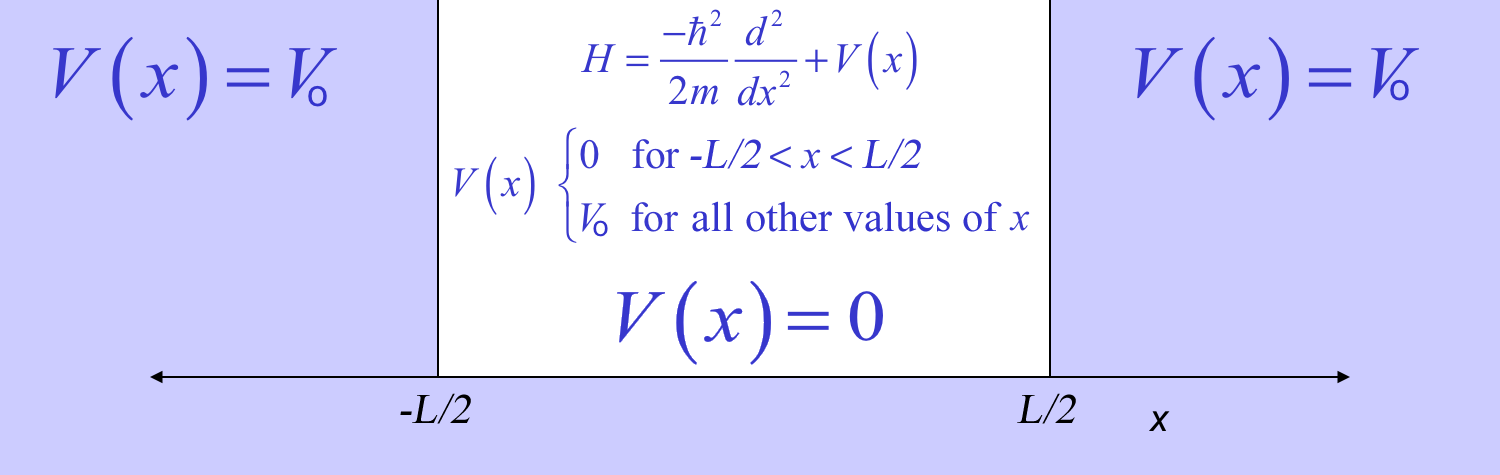

In [6]:
from IPython.display import Image
Image(filename='particle_in_a_finite_box_diagram.png')


### $\hspace 5.0 cm$  The Schrödinger equation <br/> $\hspace 2.5 cm$  Inside the box   $\hspace 3.0 cm$ vs   $\hspace 2.5 cm$ Outside the box

$\begin{array}{ccc}
\large {\frac{d^2\psi(x)}{d x^2}} = -\frac{2mE}{\hbar^2}\psi(x) =\small {-k^2} \psi(x) &\hspace 1.5 cm &\large{\frac{d^2\psi(x)}{d x^2} = -\frac{2m(E-V_o)}{\hbar^2}\psi(x)} \\
 \mbox{Solutions have the general form of } \psi(x) = e^{\pm ikx} &\hspace 1.5 cm &
 \mbox{If } E>V_o \mbox{, the particle is unbounded and} \\
 \mbox{Therefore:} &\hspace 1.5 cm& \mbox{the particle moves freely above the walls} \\
 \psi(x) = q_1 \cos(kx) + q_2 \sin(kx) &\hspace 0.5 cm& \mbox{If } E<V_o \mbox{, the particle is bounded and} \\
  &\hspace 0.5 cm & \mbox{within the walls} \end{array} $

For $E<V_o$, it is really interesting to look at what happens outside the walls.

When $E<V_o$, the Schrödinger equation becomes   $$\large{\frac{\partial^2\psi(x)}{\partial x^2}} = \alpha_o^2\cdot \psi(x)$$ since $\alpha_o^2 = \frac{2m(V_o-E)}{\hbar^2} >0$. The solutions to this equation have the general form of $$\large{\psi(x) =e^{\pm\alpha_o x}}$$.

Note that the exponential function doesn't require an imaginary component, thus it is not oscillatory.

Before we move on, here are some questions to consider:
* **Q1:** Can you test if this is a solution to the differential equation? 
* **Q2**  Can you write the **general solution** por a particle outside the box.
* **Q3:** What is the value of $\alpha_o$?
* **Q4:** Given that $\psi(x)$ must be finite, how would this constrain the solutions for $x\rightarrow -\infty$?   
* **Q5:** Given that $\psi(x)$ must be finite, how would this constrain the solutions for $x\rightarrow \infty$? 

From the general solutions, and applying those constrains, we can consider three distinct regions.  
In each region the wavefunction for $E<V_o$ will be:

$$\begin{array} {llcl}
I: & V(x) = Vo  & \hspace 0.75 cm x \leq-\frac{L}{2} & \hspace 0.75 cm\psi_{I} = A e^{\alpha_o  x} \\
II: & V(x) = 0  & \hspace 0.75 cm-\frac{L}{2} \leq x \leq\frac{L}{2} & \hspace 0.75 cm\psi_{II} = B \cos(k x) + C \sin(k x)\\
III: & V(x) =Vo  &\hspace 0.75 cm x \geq \frac{L}{2} &\hspace 0.75 cm \psi_{III} = D e^{-\alpha_o x}\end{array} $$

where:

$$\alpha_o = \frac{\sqrt{2m(V_o-E)}}{\hbar} \hspace 3cm  k = \frac{\sqrt{2mE}}{\hbar}$$

The wavefunction must obey the following **boundary conditions**:

$\large{\psi_{I}\left(-\frac{L}{2}\right) = \psi_{II}\left(-\frac{L}{2}\right)} \hspace 1cm $   and 
$ \hspace 1cm \large{\psi_{II}\left(\frac{L}{2}\right) = \psi_{III}\left(\frac{L}{2}\right)}$

$\large{\psi^{'}_{I}\left(-\frac{L}{2}\right) = \psi^{'}_{II}\left(-\frac{L}{2}\right)} \hspace 1cm $   and 
$ \hspace 1cm \large{\psi^{'}_{II}\left(\frac{L}{2}\right) = \psi^{'}_{III}\left(\frac{L}{2}\right)}$ 

where the symbol $'$ corresponds to the first derivative with respect to $x$ ($\;\psi^{'} = \frac{d\psi}{dx}$)

**Note:** $\psi^{'}$ needs to be continuous to guarantee the existence of $\psi^{''}$, whose existence is required from the first postulate.  $\large{\frac{d^2}{dx^2}}$ is a component of the kinetic energy operator. If the wavefucntion doesn't have a well-defined second derivative, then the kinetic energy would be undefined, which is not possible.

It can be shown that when the potential is even ($V(-x) = V(x)$),  the wavefunctions can be either even $[\psi(-x) = \psi(x)]$ or odd $[\psi(-x) = -\psi(x)]$.   
On the way the potential is written, we are considering that the particle is in a finite box with an even potential. Thus, even and odd solutions of the wavefucntion can be found independently:

**Even solutions:**
$$\begin{array} {ll}
\mbox{For } x \leq-\frac{L}{2}: & \psi_{I}(x) = D e^{\alpha_o  x} \\
\mbox{For } -\frac{L}{2} \leq x \leq\frac{L}{2}: & \psi_{II}(x) = B \cos(k x) \\
\mbox{For } x \geq \frac{L}{2}: & \psi_{III}(x) = D e^{-\alpha_o x}\end{array} $$
After imposing the boundary conditions we reach the following relation:
$$\alpha_o = k\tan\left(k\frac{L}{2}\right)\hspace 1cm \Rightarrow \hspace 1cm \sqrt{V_o-E} = \sqrt{E}\tan\left(\frac{L\sqrt{2mE}}{2\hbar}\right)   \tag{2}$$

**Odd solutions:**
$$\begin{array} {ll}
\mbox{For } x \leq-\frac{L}{2}: & \psi_{I}(x) = -D e^{\alpha_o  x} \\
\mbox{For } -\frac{L}{2} \leq x \leq\frac{L}{2}: & \psi_{II}(x) = C \sin(k x) \\
\mbox{For } x \geq \frac{L}{2}: & \psi_{III}(x) = D e^{-\alpha_o x}\end{array} $$
After imposing the boundary conditions we reach the following relation:
$$\alpha_o = -\frac{k}{\tan\left(k\frac{L}{2}\right)} \hspace 1cm \Rightarrow  \hspace 1cm \sqrt{V_o-E} = -\frac{\sqrt{E}}{\tan\left(\frac{L\sqrt{2mE}}{2\hbar}\right)}\tag{3}$$

The actual solutions will be those corresponding to energies that obey equations 2 and 3.
Once we find the allowed energies, we can go back and obtain the wavefunctions with the proper coefficients. 

## Finding the allowed Energies graphically 

Unfortunately, we cannot find the allowed energies analytically. Instead we can do it graphically (first) or numerically (later). That is: we can graph the left and right hand side equations 2 and 3 and look for the intersection points. Those will correspond to the allowed energy values.

Enter the value for Vo (in eV) = 8
Enter the value for L (in Angstroms) = 10


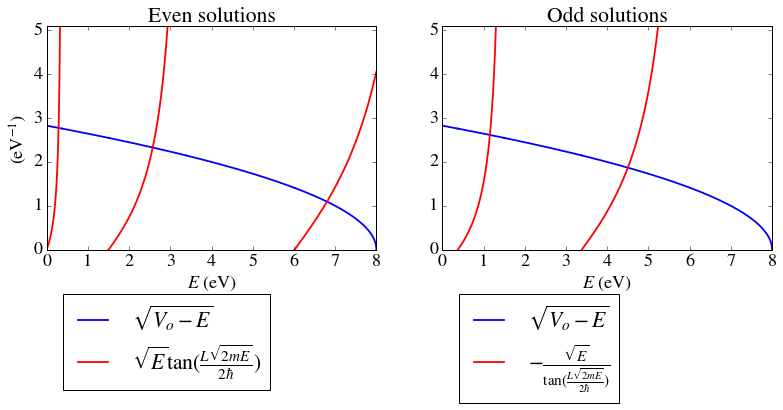

In [7]:
# Reading the input variables from the user
Vo = float(input("Enter the value for Vo (in eV) = "))
L =  float(input("Enter the value for L (in Angstroms) = "))

hbar = 1.05457180013e-34 # planck's constant divided by 2*pi, in Joules*second
melec = 9.10938356e-31 # mass of an electron in kg
eVtoJ = 1.60217662e-19 # conversion factor from eV to Joules
AngstromtoMeter = 1e-10 # conversion factor from Angstroms to meters
val = np.sqrt(2.0*melec*eVtoJ)*AngstromtoMeter/(2.0*hbar) # prefactor sqrt(2*melec)/(2*hbar), for when L is in angstroms and Vo is in eV

# Generating the graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
axes[0].set_xlabel(r'$E$ (eV)')
axes[0].set_ylabel(r'(eV$^{-1}$)')
axes[0].set_title('Even solutions')
axes[1].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
axes[1].set_xlabel(r'$E$ (eV)')
axes[1].set_ylabel(r'')
axes[1].set_title('Odd solutions')
E = np.linspace(0.0, Vo, 10000)
num = int(round((L*np.sqrt(Vo)*val-np.pi/2.0)/np.pi))
# Removing discontinuity points
for n in range(10000):
    for m in range(num+2):
        if abs(E[n]-((2.0*float(m)+1.0)*np.pi/(2.0*L*val))**2)<0.01: E[n] = np.nan
        if abs(E[n]-(float(m)*np.pi/(L*val))**2)<0.01: E[n] = np.nan
# Plotting the curves and setting the labels
axes[0].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
axes[0].plot(E, np.sqrt(E)*np.tan(L*np.sqrt(E)*val), label=r"$\sqrt{E}\tan(\frac{L\sqrt{2mE}}{2\hbar})$", color="red", linewidth=1.8)
axes[1].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
axes[1].plot(E, -np.sqrt(E)/np.tan(L*np.sqrt(E)*val), label=r"$-\frac{\sqrt{E}}{\tan(\frac{L\sqrt{2mE}}{2\hbar})}$", color="red", linewidth=1.8)
# Chosing the positions of the legends
axes[0].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)
axes[1].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)

# Show the plots on the screen once the code reaches this point
plt.show()

The allowed values would then be the values of $E$ in which the two curves cross.
Here are some question to think about:
* **Q1:** How many bound states are possible?
* **Q2:** How many bound states are even and how many are odd?
* **Q3:** Is the ground state described by an even or an odd wavefunction?
* **Q4:** Can you read accuretely the allowed values of energy from these graphs?

The allowed values of $E$ can be found by numerically, yielding:

In [8]:
print ("The allowed bounded energies are:")
# We want to find the values of E in which f_even and f_odd are zero
f_even = lambda E : np.sqrt(Vo-E)-np.sqrt(E)*np.tan(L*np.sqrt(E)*val)
f_odd = lambda E : np.sqrt(Vo-E)+np.sqrt(E)/np.tan(L*np.sqrt(E)*val)
E_old = 0.0
f_even_old = f_even(0.0)
f_odd_old = f_odd(0.0)
n = 1
E_vals = np.zeros(999)
# Here we loop from E = 0 to E = Vo seeking roots
for E in np.linspace(0.0, Vo, 200000):
    f_even_now = f_even(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if f_even_now == 0.0 or f_even_now/f_even_old < 0.0:
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_even_now)<1.0 and abs(f_even_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print "  State #%3d (Even wavefunction): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19)
            n += 1
    f_odd_now = f_odd(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if f_odd_now == 0.0 or f_odd_now/f_odd_old < 0.0:
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_odd_now)<1.0 and abs(f_odd_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print "  State #%3d  (Odd wavefunction): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19)
            n += 1
    E_old = E
    f_even_old = f_even_now
    f_odd_old = f_odd_now
nstates = n-1
print ("\nTHERE ARE %3d POSSIBLE BOUNDED ENERGIES" % nstates)

The allowed bounded energies are:
  State #  1 (Even wavefunction):    0.2899 eV,   4.64473e-20 J
  State #  2  (Odd wavefunction):    1.1542 eV,   1.84921e-19 J
  State #  3 (Even wavefunction):    2.5735 eV,   4.12316e-19 J
  State #  4  (Odd wavefunction):    4.5016 eV,   7.21236e-19 J
  State #  5 (Even wavefunction):    6.8017 eV,   1.08975e-18 J

THERE ARE   5 POSSIBLE BOUNDED ENERGIES


We can now plot these energy values as a diagram. **Plotting an Energy Diagram helps us to see the energy separation between the states.**

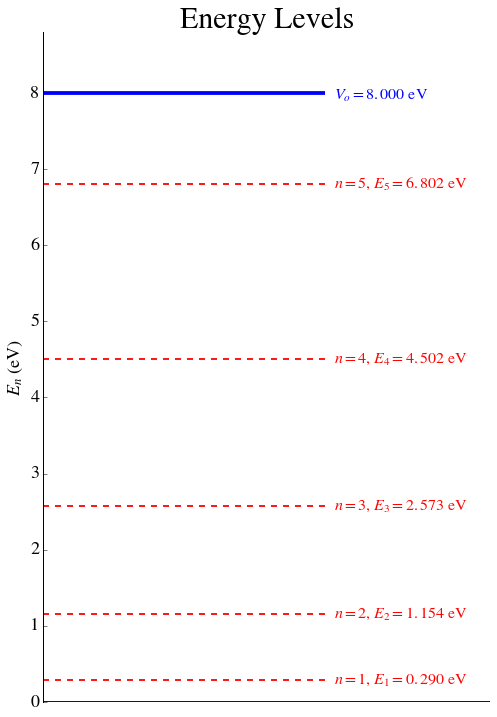

In [43]:
# Generating the energy diagram
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.axis([0.0,10.0,0.0,1.1*Vo])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nstates+1):
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(6.5, E_vals[n-1]-0.005*Vo, str1, fontsize=16, color="red")
    ax.hlines(E_vals[n-1], 0.0, 6.3, linewidth=1.8, linestyle='--', color="red")
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(6.5, Vo-0.01*Vo, str1, fontsize=16, color="blue")
ax.hlines(Vo, 0.0, 6.3, linewidth=3.8, linestyle='-', color="blue")
ax.hlines(0.0, 0.0, 10.3, linewidth=1.8, linestyle='-', color="black")
plt.title("Energy Levels", fontsize=30)
plt.show()

We can  plug the values of $E$ back into the wavefunction expressions and plot the **wavefunctions** together with their corresponding **probability densities**.


The bound wavefunctions are:


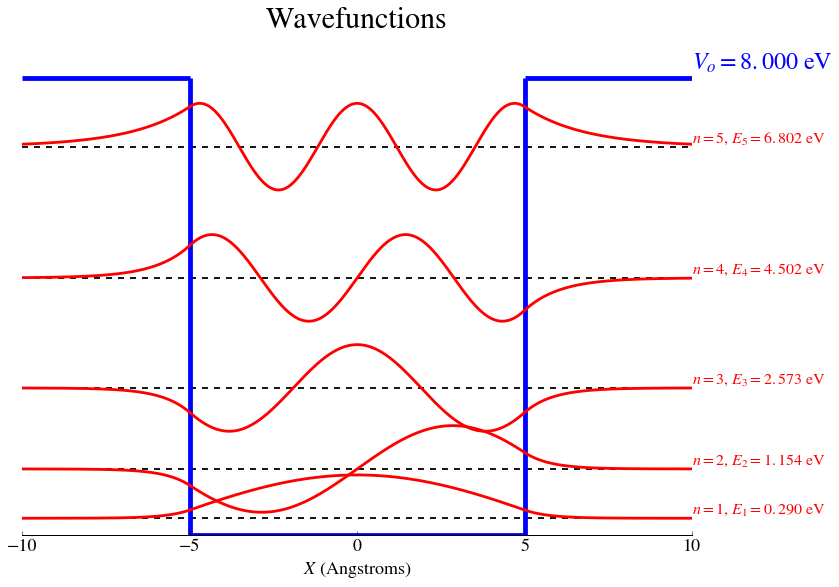

In [44]:
print ("\nThe bound wavefunctions are:")
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vo])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.0*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if (nstates > 1):
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
else:
    amp = np.sqrt((Vo-E_vals[0])/1.5)
# Plotting the wavefunctions
for n in range(1,nstates+1):
    ax.hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(2.0*L/2.0, E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plotting odd wavefunction
    if (n%2==0):
        ax.plot(X_lef,E_vals[n-1]-amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax.plot(X_mid,E_vals[n-1]+amp*np.sin(k*X_mid), color="red", label="", linewidth=2.8)
        ax.plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
    # Plotting even wavefunction
    else:
        ax.plot(X_lef,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax.plot(X_mid,E_vals[n-1]+amp*np.cos(k*X_mid), color="red", label="", linewidth=2.8)
        ax.plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(-L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L/2.0, L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, -L, -L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, L/2.0, L, linewidth=4.8, color="blue")
plt.title('Wavefunctions', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()


The bound Probability Densities are shown below 
with the areas shaded in green showing the regions where the particle can tunnel outside the box


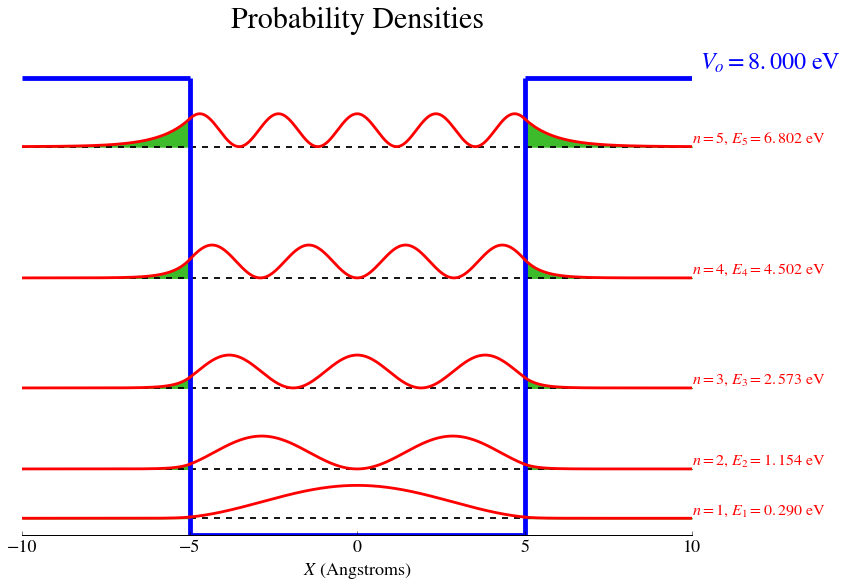

In [45]:
print ("\nThe bound Probability Densities are shown below \nwith the areas shaded in green showing the regions where the particle can tunnel outside the box")
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vo])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.05*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
# Defining the maximum amplitude of the probability density
if (nstates > 1):
    amp = (E_vals[1]-E_vals[0])/1.5
else:
    amp = (Vo-E_vals[0])/1.5
# Plotting the probability densities
for n in range(1,nstates+1):
    ax.hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(2.0*L/2.0, E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plotting odd probability densities
    if (n%2==0):
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef))**2
        ax.plot(X_lef,Y_lef, color="red", label="", linewidth=2.8)
        ax.fill_between(X_lef, E_vals[n-1], Y_lef, color="#3dbb2a")
        ax.plot(X_mid,E_vals[n-1]+amp*(np.sin(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax.plot(X_rig,Y_rig, color="red", label="", linewidth=2.8)
        ax.fill_between(X_rig, E_vals[n-1], Y_rig, color="#3dbb2a")
    # Plotting even probability densities
    else:
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef))**2
        ax.plot(X_lef,Y_lef, color="red", label="", linewidth=2.8)
        ax.fill_between(X_lef, E_vals[n-1], Y_lef, color="#3dbb2a")
        ax.plot(X_mid,E_vals[n-1]+amp*(np.cos(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax.plot(X_rig,Y_rig, color="red", label="", linewidth=2.8)
        ax.fill_between(X_rig, E_vals[n-1], Y_rig, color="#3dbb2a")
ax.margins(0.00)
ax.vlines(-L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L/2.0, L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, -L, -L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, L/2.0, L, linewidth=4.8, color="blue")
plt.title('Probability Densities', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

If we compare these results with those of a particle in a box of same size but with infinite potential, we conclude that in the finite box, the levels are shifted to lower energies.
More strikingly is the observation that the wavefunctions and the probability densities have non-zero values outside the box limits.

Classically, the particle cannot be found outside the box because the available energy is lower than the potential wall ($E < V_o$). However, for the particle in the finite box the wavefunction is nonzero outside the box, which means that there is a possibility of finding the particle outside the box. This is a pure quantum effect called the **tunneling effect**.

The tunneling probability correspond to the area outside the box that has non-zero values of probability density. In the graphicaly representation, those areas are shaded in green. The integration of those areas provide the probability that the particle will tunnel outside the classically allowed region. 

$$ \large{\frac{\int^{\frac{-L}{2}}_{-\infty} |\psi(x)|^2\ dx +\int^{+\infty}_{\frac{L}{2}} |\psi(x)|^2\ dx }{\int_{-\infty}^{+\infty} |\psi(x)|^2\ dx }}$$
where the denominator is 1 for a normalized wavefunction.

This integral can be solved analytically (for the even and for the odd solutions). The tunneling probability for each state is:

In [46]:
print ("\nThe tunneling probabilities are:")
for n in range(1,nstates+1):
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # For odd solution
    if (n%2==0):
        C = 1.0
        D = np.exp(a0*L/2.0)*np.sin(k*L/2.0)*C
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L-np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    # For even solution
    else:
        B = 1.0
        D = np.exp(a0*L/2.0)*np.cos(k*L/2.0)*B
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L+np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    print "  State #%3d tunneling probability = %5.2f%%" % (n,100*prob)


The tunneling probabilities are:
  State #  1 tunneling probability =  0.45%
  State #  2 tunneling probability =  1.87%
  State #  3 tunneling probability =  4.62%
  State #  4 tunneling probability =  9.72%
  State #  5 tunneling probability = 22.35%


These evaluation and graphical representations show that the tunneling probability increases as the energy of the particle increases. This behavior is expected because, the higher the energy is, the lower the difference $V_o-E$ is, thus it becomes easier for the tunneling to happen.  In other words, the closer the state is to the top of the potential barrier, the easier it is to spread outside.

Try evaluating these tunneling probabilities for different heights of the walls (different $V_o$ values).  Do you expect the number of bound states to increase or decrease as $V_o$ increases?

### We are now ready to tackle "Particle in a box with two finite-potential external walls and a barrier between them" ###